Name:Mithunjai.E			24BAD071		21-02-2026
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91638\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Misclassified Examples:
                                                message label
1044  We know someone who you know that fancies you....  spam
683   Hi I'm sue. I am 20 years old and work as a la...  spam
15    XXXMobileMovieClub: To use your credit, click ...  spam
4071  Loans for any purpose even if you have Bad Cre...  spam
2312  tddnewsletter@emc1.co.uk (More games from TheD...  spam
Accuracy: 0.9659192825112107
Precision: 1.0
Recall: 0.7466666666666667
F1 Score: 0.8549618320610687

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Alpha=0.1 Accuracy=0.9820627802690582
Alpha=0.5 Accuracy=0.9775784753363229
Alpha=1.0 Accuracy=0.9659192825112107
Alpha=2.0 Accuracy=0.9363228699551569


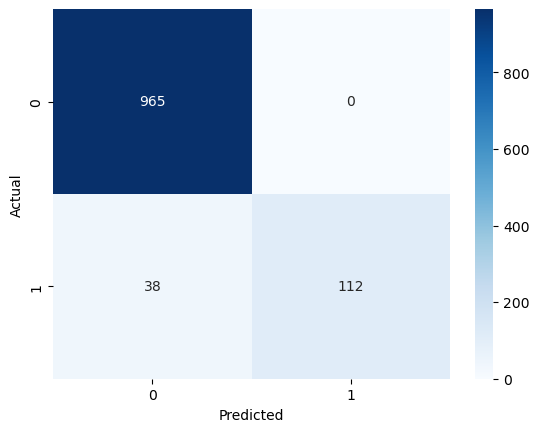

Top Spam Words:
reply
text
stop
ur
prize
claim
mobile
txt
free
call


In [4]:
print("Name:Mithunjai.E\t\t\t24BAD071\t\t21-02-2026")
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# 2. Load Dataset
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1','v2']]
df.columns = ['label','message']

print(df.head())

# 3. Text Preprocessing
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['clean_message'] = df['message'].apply(clean_text)

# 4. Convert Text to Numerical Features (TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])

# 5. Encode Target Labels
le = LabelEncoder()
y = le.fit_transform(df['label'])   # spam=1, ham=0

# 6. Split Dataset
# Split dataset WITH index tracking
# Split dataset WITH index tracking
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42
)

# 7. Train Multinomial Naive Bayes
model = MultinomialNB(alpha=1.0)   # Laplace smoothing
model.fit(X_train, y_train)

# 8. Predict
# Predict
y_pred = model.predict(X_test)

# Find misclassified samples
misclassified_idx = idx_test[y_test != y_pred]

misclassified = df.loc[misclassified_idx]

print("Misclassified Examples:")
print(misclassified[['message','label']].head())

# 9. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred))


for alpha in [0.1, 0.5, 1.0, 2.0]:
    temp_model = MultinomialNB(alpha=alpha)
    temp_model.fit(X_train, y_train)
    pred = temp_model.predict(X_test)
    print(f"Alpha={alpha} Accuracy={accuracy_score(y_test,pred)}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

feature_names = vectorizer.get_feature_names_out()
spam_probs = model.feature_log_prob_[1]
top10 = np.argsort(spam_probs)[-10:]

print("Top Spam Words:")
for i in top10:
    print(feature_names[i])

spam_words = " ".join(df[df.label=='spam']['clean_message'])
ham_words = " ".join(df[df.label=='ham']['clean_message'])